In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Example: Fetching metadata from PubMed using the Entrez API
def fetch_pubmed_data(query, max_results=10):
    # PubMed API URL
    url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term={query}&retmax={max_results}&usehistory=y"
    
    # Make request to PubMed API
    response = requests.get(url)
    
    # Parse XML response
    xml_data = response.text
    soup = BeautifulSoup(xml_data, 'xml')
    
    # Extract PubMed IDs (PMID) from the response
    pmids = [pmid.text for pmid in soup.find_all('Id')]
    
    # Fetch article details using PubMed IDs
    article_details = []
    for pmid in pmids:
        article_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=pubmed&id={pmid}&retmode=xml"
        article_response = requests.get(article_url)
        article_soup = BeautifulSoup(article_response.text, 'xml')
        
        # Extract metadata
        title = article_soup.find('Item', {'Name': 'Title'}).text
        authors = article_soup.find('Item', {'Name': 'AuthorList'}).text
        source = article_soup.find('Item', {'Name': 'Source'}).text
        pubdate = article_soup.find('Item', {'Name': 'PubDate'}).text
        
        # Append article data to list
        article_details.append({
            'PMID': pmid,
            'Title': title,
            'Authors': authors,
            'Source': source,
            'Publication Date': pubdate
        })
    
    # Return data as DataFrame
    return pd.DataFrame(article_details)

# Example query: Fetch studies related to "breast cancer NLP"
df = fetch_pubmed_data("breast+cancer+NLP", max_results=5)
print(df)

# Save to CSV for further analysis
df.to_csv("pubmed_studies.csv", index=False)


       PMID                                              Title  \
0  40202866  A Deep-Learning-Enabled Workflow to Estimate R...   
1  40153782  Large Language Model Applications for Health I...   
2  39965024  Leveraging natural language processing for eff...   
3  39894080  NLP for Analyzing Electronic Health Records an...   
4  39881478  Exploring the Social Media Discussion of Breas...   

                                             Authors                 Source  \
0  \nVarma G\nYenukoti RK\nKumar M P\nAshrit BS\n...            JMIR Cancer   
1  \nChen D\nAlnassar SA\nAvison KE\nHuang RS\nRa...            JMIR Cancer   
2  \nPark P\nChoi Y\nHan N\nPark YL\nHwang J\nCha...               PLoS One   
3                      \nBilal M\nHamza A\nMalik N\n  J Pain Symptom Manage   
4  \nSpiegel DY\nFriesner ID\nZhang W\nZack T\nYa...            JMIR Cancer   

  Publication Date  
0      2025 Mar 21  
1      2025 Mar 28  
2             2025  
3      2025 Jan 31  
4      2025 Jan 28  


In [2]:
pip install lxml 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 3.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


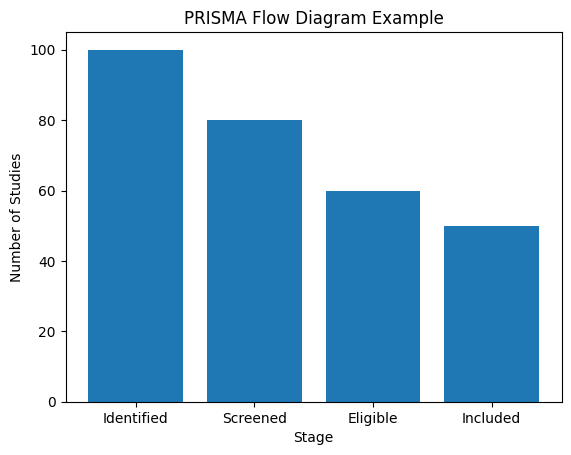

In [2]:
import matplotlib.pyplot as plt

def plot_prisma_flow():
    stages = ['Identified', 'Screened', 'Eligible', 'Included']
    counts = [100, 80, 60, 50]  # Example counts
    
    plt.bar(stages, counts)
    plt.title('PRISMA Flow Diagram Example')
    plt.xlabel('Stage')
    plt.ylabel('Number of Studies')
    plt.show()

plot_prisma_flow()
